#Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import ast
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scipy import stats
from scipy.spatial import cKDTree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

#Punto dos

##Data Sets

###data Vivienda

In [ ]:
prueba = pd.read_csv("/content/archivo.csv")

<ipython-input-174-d7e3f20e6f9f>:1: DtypeWarning:

Columns (9,15,16,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
prueba

_id          codigo tipo_propiedad  \
0      {'$oid': '64903166384bbcf0c9bbd349'}    374-M2718950    APARTAMENTO   
1      {'$oid': '64903169384bbcf0c9bbd34a'}   2510-M4156145    APARTAMENTO   
2      {'$oid': '6490316e384bbcf0c9bbd34b'}  10312-M2873283    APARTAMENTO   
3      {'$oid': '64903172384bbcf0c9bbd34c'}  10139-M4343016    APARTAMENTO   
4      {'$oid': '64903176384bbcf0c9bbd34d'}  10139-M3692828    APARTAMENTO   
...                                     ...             ...            ...   
82827  {'$oid': '652b52789d43ca36ce25c3af'}   3858-M4625362    APARTAMENTO   
82828  {'$oid': '652b52f79d43ca36ce25c3b0'}   2361-M4625079    APARTAMENTO   
82829  {'$oid': '652b52fc9d43ca36ce25c3b1'}  11013-M4575253    APARTAMENTO   
82830  {'$oid': '652b53089d43ca36ce25c3b2'}  12500-M4623759    APARTAMENTO   
82831  {'$oid': '652b532e9d43ca36ce25c3b3'}   2214-M4626518    APARTAMENTO   

         tipo_operacion                   precio_venta  \
0      VENTA Y ARRIENDO  {'$numberLong': '2500000000'}   
1                 VENTA                      485000000   
2      VENTA Y ARRIENDO                     1980000000   
3                 VENTA                      495000000   
4                 VENTA                     1570000000   
...                 ...                            ...   
82827             VENTA                     1500000000   
82828             VENTA                      350000000   
82829             VENTA                      500000000   
82830             VENTA                      220000000   
82831             VENTA                     1800000000   

                precio_arriendo   area  habitaciones  banos administracion  \
0                      13500000  320.0           4.0    5.0        2500000   
1      {'$numberDouble': 'NaN'}   84.0           3.0    3.0         680000   
2                       9000000  248.0           3.0    3.0        2200000   
3      {'$numberDouble': 'NaN'}   77.2           3.0    2.0         367000   
4      {'$numberDouble': 'NaN'}  213.0           3.0    4.0         994000   
...                         ...    ...           ...    ...            ...   
82827                       NaN  180.0           3.0    4.0      1300000.0   
82828                       NaN   82.0           3.0    2.0       300000.0   
82829                       NaN   76.0           3.0    2.0       785000.0   
82830                       NaN   44.0           2.0    2.0       130500.0   
82831                       NaN  299.0           4.0    4.0      2200000.0   

       ...                               datetime            website  \
0      ...  {'$date': '2023-06-19T05:43:49.763Z'}  metrocuadrado.com   
1      ...  {'$date': '2023-06-19T05:43:53.411Z'}  metrocuadrado.com   
2      ...  {'$date': '2023-06-19T05:43:58.765Z'}  metrocuadrado.com   
3      ...  {'$date': '2023-06-19T05:44:02.598Z'}  metrocuadrado.com   
4      ...  {'$date': '2023-06-19T05:44:06.286Z'}  metrocuadrado.com   
...    ...                                    ...                ...   
82827  ...  {'$date': '2023-10-15T02:46:15.929Z'}  metrocuadrado.com   
82828  ...  {'$date': '2023-10-15T02:48:23.580Z'}  metrocuadrado.com   
82829  ...  {'$date': '2023-10-15T02:48:28.767Z'}  metrocuadrado.com   
82830  ...  {'$date': '2023-10-15T02:48:40.328Z'}  metrocuadrado.com   
82831  ...  {'$date': '2023-10-15T02:49:18.752Z'}  metrocuadrado.com   

                             compañia  \
0                        LIDIS MACIAS   
1          JM GESTIONES INMOBILIARIAS   
2                           PENTAGOLD   
3           DIANA RODRIGUEZ FERNANDEZ   
4           DIANA RODRIGUEZ FERNANDEZ   
...                               ...   
82827  A 12 INVERSIONES INMOBILIARIAS   
82828             BIENCO INMOBILIARIA   
82829                    REDINMUEBLES   
82830                           WALLS   
82831                     ACRECER SAS   

                                                imagenes  \
0      ['https://multimedia.metrocuadrado.com/374-M

In [ ]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82832 entries, 0 to 82831
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   _id                                  82832 non-null  object 
 1   codigo                               82832 non-null  object 
 2   tipo_propiedad                       82832 non-null  object 
 3   tipo_operacion                       82832 non-null  object 
 4   precio_venta                         66804 non-null  object 
 5   precio_arriendo                      46564 non-null  object 
 6   area                                 82829 non-null  float64
 7   habitaciones                         82823 non-null  float64
 8   banos                                82825 non-null  float64
 9   administracion                       72537 non-null  object 
 10  parqueaderos                         82823 non-null  float64
 11  sector                      

In [ ]:
# Calcular el porcentaje de valores vacíos por columna
missing_percentage = (prueba.isnull().sum() / len(prueba)) * 100

# Crear un DataFrame para mostrar los resultados
missing_data = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})

# Mostrar el porcentaje de vacíos en cada columna
print(missing_data)

                                 Column  Missing Percentage
0                                   _id            0.000000
1                                codigo            0.000000
2                        tipo_propiedad            0.000000
3                        tipo_operacion            0.000000
4                          precio_venta           19.350010
5                       precio_arriendo           43.785011
6                                  area            0.003622
7                          habitaciones            0.010865
8                                 banos            0.008451
9                        administracion           12.428771
10                         parqueaderos            0.010865
11                               sector            6.007340
12                              estrato            0.025353
13                           antiguedad            0.035011
14                               estado            1.547711
15                             longitud 

In [ ]:
# Columnas a eliminar
columns_to_drop = [
    '_id',
    'featured_sector',
    'last_view',
    'fecha_actualizacion_precio_venta',
    'precio_venta_anterior',
    'fecha_actualizacion_precio_arriendo',
    'precio_arriendo_anterior',
    'direccion',
    'imagenes',
    'compañia',
    'precio_arriendo'
]

# Eliminar las columnas del DataFrame
prueba_cleaned = prueba.drop(columns=columns_to_drop)

# Mostrar el DataFrame resultante
print(prueba_cleaned.head())

           codigo tipo_propiedad    tipo_operacion  \
0    374-M2718950    APARTAMENTO  VENTA Y ARRIENDO   
1   2510-M4156145    APARTAMENTO             VENTA   
2  10312-M2873283    APARTAMENTO  VENTA Y ARRIENDO   
3  10139-M4343016    APARTAMENTO             VENTA   
4  10139-M3692828    APARTAMENTO             VENTA   

                    precio_venta   area  habitaciones  banos administracion  \
0  {'$numberLong': '2500000000'}  320.0           4.0    5.0        2500000   
1                      485000000   84.0           3.0    3.0         680000   
2                     1980000000  248.0           3.0    3.0        2200000   
3                      495000000   77.2           3.0    2.0         367000   
4                     1570000000  213.0           3.0    4.0         994000   

   parqueaderos                sector  ...         antiguedad estado  \
0           3.0               COUNTRY  ...     MAS DE 20 ANOS  USADO   
1           1.0         SANTA BARBARA  ...     MAS DE 20

In [ ]:
print(prueba_cleaned.dtypes)

codigo                  object
tipo_propiedad          object
tipo_operacion          object
precio_venta            object
area                   float64
habitaciones           float64
banos                  float64
administracion          object
parqueaderos           float64
sector                  object
estrato                float64
antiguedad              object
estado                  object
longitud                object
latitud                 object
featured_interior       object
featured_exterior       object
featured_zona_comun     object
descripcion             object
datetime                object
website                 object
dtype: object


In [ ]:
columns_to_convert = ['administracion','longitud', 'latitud', 'precio_venta']

for col in columns_to_convert:
    # Remover símbolos no numéricos (como $ y comas)
    prueba_cleaned[col] = prueba_cleaned[col].replace({r'\$': '', ',': '', ' ': ''}, regex=True)
    # Intentar convertir a numérico
    prueba_cleaned[col] = pd.to_numeric(prueba_cleaned[col], errors='coerce')

# Verificar los tipos de datos actualizados
print(prueba_cleaned.dtypes)

codigo                  object
tipo_propiedad          object
tipo_operacion          object
precio_venta           float64
area                   float64
habitaciones           float64
banos                  float64
administracion         float64
parqueaderos           float64
sector                  object
estrato                float64
antiguedad              object
estado                  object
longitud               float64
latitud                float64
featured_interior       object
featured_exterior       object
featured_zona_comun     object
descripcion             object
datetime                object
website                 object
dtype: object


In [ ]:
print(prueba_cleaned[['latitud','longitud']].head())

    latitud   longitud
0  4.715475 -74.026855
1  4.694500 -74.045900
2  4.690854 -74.027916
3  4.742382 -74.056400
4  4.708852 -74.028244


In [ ]:
print(prueba_cleaned[['datetime']].head())

                                datetime
0  {'$date': '2023-06-19T05:43:49.763Z'}
1  {'$date': '2023-06-19T05:43:53.411Z'}
2  {'$date': '2023-06-19T05:43:58.765Z'}
3  {'$date': '2023-06-19T05:44:02.598Z'}
4  {'$date': '2023-06-19T05:44:06.286Z'}


In [ ]:
# Función para extraer el valor del diccionario
def extract_value(col):
    return col.apply(lambda x: ast.literal_eval(x)['$date'] if isinstance(x, str) and '$date' in x else x)

# Extraer las fechas
prueba_cleaned['datetime'] = extract_value(prueba_cleaned['datetime'])

# Convertir columnas de fecha a tipo datetime
prueba_cleaned['datetime'] = pd.to_datetime(prueba_cleaned['datetime'], errors='coerce')

# Mostrar las primeras filas del DataFrame limpio
print(prueba_cleaned[['datetime']].head())

                          datetime
0 2023-06-19 05:43:49.763000+00:00
1 2023-06-19 05:43:53.411000+00:00
2 2023-06-19 05:43:58.765000+00:00
3 2023-06-19 05:44:02.598000+00:00
4 2023-06-19 05:44:06.286000+00:00


In [ ]:
prueba_cleaned.head()

codigo tipo_propiedad    tipo_operacion  precio_venta   area  \
0    374-M2718950    APARTAMENTO  VENTA Y ARRIENDO           NaN  320.0   
1   2510-M4156145    APARTAMENTO             VENTA  4.850000e+08   84.0   
2  10312-M2873283    APARTAMENTO  VENTA Y ARRIENDO  1.980000e+09  248.0   
3  10139-M4343016    APARTAMENTO             VENTA  4.950000e+08   77.2   
4  10139-M3692828    APARTAMENTO             VENTA  1.570000e+09  213.0   

   habitaciones  banos  administracion  parqueaderos                sector  \
0           4.0    5.0       2500000.0           3.0               COUNTRY   
1           3.0    3.0        680000.0           1.0         SANTA BARBARA   
2           3.0    3.0       2200000.0           3.0         SANTA BARBARA   
3           3.0    2.0        367000.0           1.0  COLINA Y ALREDEDORES   
4           3.0    4.0        994000.0           3.0               COUNTRY   

   ...         antiguedad estado   longitud   latitud  \
0  ...     MAS DE 20 ANOS  USADO -74.026855  4.715475   
1  ...     MAS DE 20 ANOS  USADO -74.045900  4.694500   
2  ...     MAS DE 20 ANOS  USADO -74.027916  4.690854   
3  ...  ENTRE 5 Y 10 ANOS  USADO -74.056400  4.742382   
4  ...  ENTRE 5 Y 10 ANOS  USADO -74.028244  4.708852   

                                   featured_interior  \
0  ['ALARMA', 'CHIMENEA', 'CITOFONOS', 'COMEDOR A...   
1  ['CITOFONOS', 'TIPO DE CORTINAS NINGUNA', 'PAR...   
2  ['APTO PARA NINOS', 'CHIMENEA', 'CITOFONOS', '...   
3  ['APTO PARA NINOS', 'CITOFONOS', 'ESTUDIO O BI...   
4  ['CITOFONOS', 'PARQUEADERO CUBIERTO', 'ZONA DE...   

                                   featured_exterior  \
0  ['AREA TERRAZA/BALCON 120 M2', 'ASCENSOR', 'CI...   
1  ['ASCENSOR', 'CIRCUITO CERRADO DE TV', 'CONJUN...   
2  ['AREA TERRAZA/BALCON 12 M2', 'ASCENSOR', 'ACC...   
3  ['AREA TERRAZA/BALCON 3 M2', 'ASCENSOR', 'ACCE...   
4  ['ASCENSOR', 'PISCINA', 'CONJUNTO CERRADO', 'N...   

                                 featured_zona_comun  \
0  ['CANCHA(S) DE SQUASH', 'CANCHA(S) DE TENNIS',...   
1  ['CERCA CENTROS COMERCIALES', 'CERCA COLEGIOS ...   
2  ['SALON COMUNAL', 'ZONA DE BBQ', 'ZONA PARA NI...   
3  ['GIMNASIO', 'SALON COMUNAL', 'ZONA DE BBQ', '...   
4  ['CANCHA(S) DE SQUASH', 'GIMNASIO', 'SALON COM...   

                                         descripcion  \
0  vendo o arriendo ph duplex montearroyo, 320 mt...   
1  oportunidad, bonito apartamento, recien refacc...   
2  presentamos espectacular apartamento en uno de...   
3  lindo apartamento, con 3 habitaciones 2 banos,...   
4  vendo o arriendo iraka t 4 apto 201  213m mas ...   

                          datetime            website  
0 2023-06-19 05:43:49.763000+00:00  metrocuadrado.com  
1 2023-06-19 05:43:53.411000+00:00  metrocuadrado.com  
2 2023-06-19 05:43:58.765000+00:00  metrocuadrado.com  
3 2023-06-19 05:44:02.598000+00:00  metrocuadrado.com  
4 2023-06-19 05:44:06.286000+00:00  metrocuadrado.com  

[5 rows x 21 columns]

In [ ]:
prueba_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82832 entries, 0 to 82831
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   codigo               82832 non-null  object             
 1   tipo_propiedad       82832 non-null  object             
 2   tipo_operacion       82832 non-null  object             
 3   precio_venta         44154 non-null  float64            
 4   area                 82829 non-null  float64            
 5   habitaciones         82823 non-null  float64            
 6   banos                82825 non-null  float64            
 7   administracion       55909 non-null  float64            
 8   parqueaderos         82823 non-null  float64            
 9   sector               77856 non-null  object             
 10  estrato              82811 non-null  float64            
 11  antiguedad           82803 non-null  object             
 12  estado            

In [ ]:
# # Eliminar la columna 'index' si ya existe
# if 'index' in prueba_cleaned.columns:
#    prueba_cleaned.drop(columns=['index'], inplace=True)

# # Agregar una nueva columna de índice en la primera posición
# prueba_cleaned.insert(0, 'index', range(len(prueba_cleaned)))

In [ ]:
# Filtrar los datos que tienen latitud y longitud válidos
prueba_cleaned_filtered = prueba_cleaned.dropna(subset=['latitud', 'longitud'])

# Crear el mapa de dispersión con Plotly
fig = px.scatter_mapbox(
    prueba_cleaned_filtered,
    lat='latitud',
    lon='longitud',
    hover_name='tipo_propiedad',  # Muestra información adicional al pasar el mouse por los puntos
    hover_data=['precio_venta', 'sector'],
    zoom=10,  # Ajusta el nivel de zoom inicial del mapa
    height=600  # Ajusta la altura del gráfico
)

# Configurar el estilo del mapa
fig.update_layout(
    mapbox_style='open-street-map',
    title='Mapa de Propiedades en Bogotá'
)

# Mostrar el mapa
fig.show()

###Data Troncales

In [ ]:
# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/andresvasquez01/P2/refs/heads/main/Estaciones_Troncales_de_TRANSMILENIO.csv"
troncales_df = pd.read_csv(url)

# Display the first few rows of the dataframe
troncales_df

X             Y  objectid  numero_estacion  \
0    9.978361e+05  9.966293e+05         1            10000   
1    9.981394e+05  1.016655e+06         2             3000   
2    9.951307e+05  1.009444e+06         3             6000   
3    9.963390e+05  1.012565e+06         4             4000   
4    9.893978e+05  1.003670e+06         5             5000   
..            ...           ...       ...              ...   
144  1.000864e+06  1.002806e+06       145             9115   
145  9.927715e+05  9.999314e+05       146             7004   
146  1.003763e+06  1.019089e+06       147             2502   
147  1.003491e+06  1.017519e+06       148             2000   
148  1.001454e+06  1.010039e+06       149             3011   

        nombre_estacion  coordenada_x_estacion  coordenada_y_estacion  \
0    Portal 20 de Julio           9.978361e+05           9.966293e+05   
1           Portal Suba           9.981394e+05           1.016655e+06   
2      Portal El Dorado           9.951307e+05           1.009444e+06   
3             Portal 80           9.963390e+05           1.012565e+06   
4       Portal Américas           9.893978e+05           1.003670e+06   
..                  ...                    ...                    ...   
144            Calle 34           1.000860e+06           1.002807e+06   
145             Venecia           9.927716e+05           9.999303e+05   
146            Terminal           1.003765e+06           1.019088e+06   
147        Portal Norte           1.003492e+06           1.017519e+06   
148    Suba - Calle 100           1.001319e+06           1.010417e+06   

       ubicacion_estacion troncal_estacion  numero_vagones_estacion  ...  \
0       Kra 5 a Cl 33 Sur          Cr 7-10                        1  ...   
1      Av Suba Av C. Cali             Suba                        1  ...   
2                   KR 87         Calle 26                        1  ...   
3                   KR 96         Calle 80                        1  ...   
4     Av.Cali - CL 43 sur         Americas                        1  ...   
..                    ...              ...                      ...  ...   
144  Avenida CL 34 - CL 3          Caracas                        3  ...   
145         AutoSur-Av 54              NQS                        2  ...   
146                CL 190        Autonorte                        1  ...   
147                CL 173        Autonorte                        1  ...   
148        Av Suba Cl 100             Suba                        2  ...   

     codigo_nodo_estacion    componente_wifi  componente_aplificacion  \
0                   10500  Valor SI al campo                      NaN   
1                    3000  Valor SI al campo                      NaN   
2                    6000  Valor SI al campo                      NaN   
3                    4000          PENDIENTE                      NaN   
4                    5000  Valor SI al campo                      NaN   
..                    ...                ...                      ...   
144                  9115  Valor SI al campo                      NaN   
145                  7004  Valor SI al campo                      NaN   
146                  2502  Valor NO al campo        Valor SI al campo   
147                  2000  Valor SI al campo        Valor SI al campo   
148                  3011                NaN                      NaN   

                                   globalid  created_user  created_date  \
0    {B78C011F-6DE5-44A3-A7CA-3A399CB5B6C2}           NaN           NaN   
1    {BD590104-0BBB-459F-B755-35AB19174FA0}           NaN           NaN   
2    {C0133415-310E-46CF-B5A9-666EA6E61807}           NaN           NaN   
3    {C034C342-CDED-440B-8018-ACD556FFB217}           NaN           NaN   
4    {42C4A5F7-4BB2-43F1-9F34-3DD9E16D232C}           NaN           NaN   
..                                      ...           ...           ...   
144  {421A1C57-3957-4F4D-9314-295546687CE5}           NaN           NaN   
145 

In [ ]:
troncales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                149 non-null    float64
 1   Y                                149 non-null    float64
 2   objectid                         149 non-null    int64  
 3   numero_estacion                  149 non-null    int64  
 4   nombre_estacion                  149 non-null    object 
 5   coordenada_x_estacion            149 non-null    float64
 6   coordenada_y_estacion            149 non-null    float64
 7   ubicacion_estacion               149 non-null    object 
 8   troncal_estacion                 149 non-null    object 
 9   numero_vagones_estacion          149 non-null    int64  
 10  numero_accesos_estacion          149 non-null    int64  
 11  biciestacion_estacion            149 non-null    int64  
 12  capacidad_biciestacion

In [ ]:
print(troncales_df.dtypes)

X                                  float64
Y                                  float64
objectid                             int64
numero_estacion                      int64
nombre_estacion                     object
coordenada_x_estacion              float64
coordenada_y_estacion              float64
ubicacion_estacion                  object
troncal_estacion                    object
numero_vagones_estacion              int64
numero_accesos_estacion              int64
biciestacion_estacion                int64
capacidad_biciestacion_estacion      int64
tipo_estacion                        int64
biciparqueadero_estacion             int64
latitud_estacion                   float64
longitud_estacion                  float64
codigo_nodo_estacion                 int64
componente_wifi                     object
componente_aplificacion             object
globalid                            object
created_user                       float64
created_date                       float64
last_edited

In [ ]:
# Listar las columnas a eliminar
columns_to_drop = [
    'componente_aplificacion',
    'created_user',
    'created_date',
    'log_replica',
    'coordenada_x_estacion',
    'coordenada_y_estacion',
    'X',
    'Y',
    'objectid',
    'ubicacion_estacion',
    'numero_vagones_estacion',
    'numero_accesos_estacion',
    'biciestacion_estacion',
    'capacidad_biciestacion_estacion',
    'componente_wifi',
    'codigo_nodo_estacion',
    'globalid',
    'last_edited_user',
    'last_edited_date',
    'id_trazado_troncal',
    'biciparqueadero_estacion'
]

# Eliminar las columnas especificadas
troncales_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Mostrar las primeras filas del DataFrame después de eliminar las columnas
troncales_df.head()

numero_estacion     nombre_estacion troncal_estacion  tipo_estacion  \
0            10000  Portal 20 de Julio          Cr 7-10              1   
1             3000         Portal Suba             Suba              1   
2             6000    Portal El Dorado         Calle 26              1   
3             4000           Portal 80         Calle 80              1   
4             5000     Portal Américas         Americas              1   

   latitud_estacion  longitud_estacion  
0          4.565718         -74.097008  
1          4.746815         -74.094279  
2          4.681604         -74.121395  
3          4.709829         -74.110506  
4          4.629381         -74.173058

In [ ]:
troncales_info = troncales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   numero_estacion    149 non-null    int64  
 1   nombre_estacion    149 non-null    object 
 2   troncal_estacion   149 non-null    object 
 3   tipo_estacion      149 non-null    int64  
 4   latitud_estacion   149 non-null    float64
 5   longitud_estacion  149 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 7.1+ KB


In [ ]:
troncales_df

numero_estacion     nombre_estacion troncal_estacion  tipo_estacion  \
0              10000  Portal 20 de Julio          Cr 7-10              1   
1               3000         Portal Suba             Suba              1   
2               6000    Portal El Dorado         Calle 26              1   
3               4000           Portal 80         Calle 80              1   
4               5000     Portal Américas         Americas              1   
..               ...                 ...              ...            ...   
144             9115            Calle 34          Caracas              4   
145             7004             Venecia              NQS              4   
146             2502            Terminal        Autonorte              4   
147             2000        Portal Norte        Autonorte              1   
148             3011    Suba - Calle 100             Suba              4   

     latitud_estacion  longitud_estacion  
0            4.565718         -74.097008  
1            4.746815         -74.094279  
2            4.681604         -74.121395  
3            4.709829         -74.110506  
4            4.629381         -74.173058  
..                ...                ...  
144          4.621586         -74.069754  
145          4.595567         -74.142650  
146          4.768818         -74.043569  
147          4.754621         -74.046035  
148          4.690398         -74.065618  

[149 rows x 6 columns]

In [ ]:
# # Eliminar la columna 'index' si ya existe
# if 'index' in troncales_df.columns:
#     troncales_df.drop(columns=['index'], inplace=True)

# # Agregar una nueva columna de índice en la primera posición
# troncales_df.insert(0, 'index', range(len(troncales_df)))

# # Mostrar las primeras filas del DataFrame
# troncales_df.head()

In [ ]:
# Filtrar los datos que tienen latitud y longitud válidos
troncales_filtered = troncales_df.dropna(subset=['latitud_estacion', 'longitud_estacion'])

# Crear el mapa de dispersión con Plotly
fig = px.scatter_mapbox(
    troncales_filtered,
    lat='latitud_estacion',
    lon='longitud_estacion',
    hover_name='nombre_estacion',  # Muestra información adicional al pasar el mouse por los puntos
    hover_data=['troncal_estacion', 'tipo_estacion'],  # Datos adicionales para mostrar
    zoom=10,  # Ajusta el nivel de zoom inicial del mapa
    height=600  # Ajusta la altura del gráfico
)

# Configurar el estilo del mapa
fig.update_layout(
    mapbox_style='open-street-map',
    title='Mapa de Estaciones Troncales en Bogotá'
)

# Mostrar el mapa
fig.show()

###Union Data set

In [ ]:
# # Configura la columna 'index' como índice en ambos DataFrames
# troncales_df.set_index('index', inplace=True)
# prueba_cleaned.set_index('index', inplace=True)

# # Ahora, puedes unir los DataFrames utilizando join o concat
# # Utilizando join
# result = troncales_df.join(prueba_cleaned, how='inner')  # 'inner' es el tipo de unión, puedes usar 'outer', 'left', o 'right' según necesites.

# # Verifica el resultado
# result.head()

In [ ]:
# missing_percentage = result.isnull().mean() * 100

# # Mostrar el porcentaje de datos vacíos por columna
# print(missing_percentage)

In [ ]:
# result.info()

In [ ]:
# # Filtrar los datos que tienen latitud y longitud válidos para las estaciones
# troncales_filtered = result.dropna(subset=['latitud_estacion', 'longitud_estacion'])

# # Filtrar los datos que tienen latitud y longitud válidos para los puntos
# puntos_filtered = result.dropna(subset=['latitud', 'longitud'])

# # Crear el mapa de dispersión para las estaciones
# fig = px.scatter_mapbox(
#     troncales_filtered,
#     lat='latitud_estacion',
#     lon='longitud_estacion',
#     hover_name='nombre_estacion',  # Información adicional al pasar el mouse por los puntos
#     hover_data=['troncal_estacion', 'tipo_estacion'],  # Datos adicionales para mostrar
#     zoom=10,  # Ajusta el nivel de zoom inicial del mapa
#     height=600,  # Ajusta la altura del gráfico
#     color_discrete_sequence=['red'],  # Color para las estaciones
#     title='Mapa de Estaciones y Puntos en Bogotá'
# )

# # Añadir los puntos al mismo mapa
# fig.add_scattermapbox(
#     lat=puntos_filtered['latitud'],
#     lon=puntos_filtered['longitud'],
#     mode='markers',
#     marker=dict(size=10, color='blue'),  # Color para los puntos
#     hoverinfo='text',
#     text=puntos_filtered['nombre_estacion']  # Mostrar nombre de la estación o alguna otra columna relevante
# )

# # Configurar el estilo del mapa
# fig.update_layout(
#     mapbox_style='open-street-map'
# )

# # Mostrar el mapa
# fig.show()

In [ ]:
# # Definimos una función para calcular la distancia utilizando la fórmula de Haversine
# def haversine(lat1, lon1, lat2, lon2):
#     # Convertimos las coordenadas de grados a radianes
#     lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

#     # Calculamos las diferencias
#     dlat = lat2 - lat1
#     dlon = lon2 - lon1

#     # Fórmula de Haversine
#     a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
#     c = 2 * np.arcsin(np.sqrt(a))

#     # Radio de la Tierra en kilómetros (puedes usar 3956 para millas)
#     r = 6371
#     return c * r

# # Asumiendo que 'result' contiene las coordenadas de las viviendas y de las estaciones
# # y que las columnas son 'latitud', 'longitud' para viviendas y 'latitud_estacion', 'longitud_estacion' para las estaciones.
# result['distancia_estacion'] = result.apply(
#     lambda row: haversine(
#         row['latitud'], row['longitud'],
#         row['latitud_estacion'], row['longitud_estacion']
#     ), axis=1
# )

In [ ]:
# # Generar el conjunto de datos de prueba (20% de los datos)
# test_size = 0.2
# test_data = result.sample(frac=test_size, random_state=42)  # Selecciona aleatoriamente el 20%
# train_data = result.drop(test_data.index)  # Elimina los datos de prueba del conjunto original

# # Guardar los conjuntos de datos
# train_data.to_csv('train_data.csv', index=False)
# test_data.to_csv('test_data.csv', index=False)

# # Mostrar la cantidad de datos en cada conjunto
# print(f'Tamaño del conjunto de entrenamiento: {train_data.shape[0]}')
# print(f'Tamaño del conjunto de prueba: {test_data.shape[0]}')

In [ ]:
# train_data.head()

###Union data set **2**

In [ ]:
import pandas as pd

import numpy as np

# Crear una copia explícita de las filas con latitud y longitud válidas
viviendas_temp = prueba_cleaned[prueba_cleaned['latitud'].notna() & prueba_cleaned['longitud'].notna()].copy()

# Construir el KDTree para las coordenadas de troncales
troncal_coords = list(zip(troncales_df['latitud_estacion'], troncales_df['longitud_estacion']))
troncal_tree = cKDTree(troncal_coords)

# Extraer las coordenadas de las viviendas válidas
vivienda_coords = list(zip(viviendas_temp['latitud'], viviendas_temp['longitud']))

# Calcular las distancias a la troncal más cercana
distancias, indices = troncal_tree.query(vivienda_coords, k=1)

# Asignar los resultados al DataFrame temporal de viviendas
viviendas_temp['troncal_mas_cercana'] = indices
viviendas_temp['distancia_a_troncal'] = distancias

# Combinar la información de las troncales más cercanas usando los índices obtenidos
viviendas_result = viviendas_temp.join(troncales_df.iloc[indices].reset_index(drop=True), rsuffix='_troncal')

# Reintegrar las filas originales con valores NaN en latitud o longitud
viviendas_final = prueba_cleaned.copy()
viviendas_final[['troncal_mas_cercana', 'distancia_a_troncal']] = np.nan
viviendas_final.update(viviendas_result[['troncal_mas_cercana', 'distancia_a_troncal']])

# # Verificar el resultado final
# print(viviendas_final.head())

In [ ]:
viviendas_final.to_csv('viviendas_con_troncal_mas_cercana.csv', index=False)

In [ ]:
viviendas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82832 entries, 0 to 82831
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   codigo               82832 non-null  object             
 1   tipo_propiedad       82832 non-null  object             
 2   tipo_operacion       82832 non-null  object             
 3   precio_venta         44154 non-null  float64            
 4   area                 82829 non-null  float64            
 5   habitaciones         82823 non-null  float64            
 6   banos                82825 non-null  float64            
 7   administracion       55909 non-null  float64            
 8   parqueaderos         82823 non-null  float64            
 9   sector               77856 non-null  object             
 10  estrato              82811 non-null  float64            
 11  antiguedad           82803 non-null  object             
 12  estado            

In [ ]:
# Graficar las viviendas en verde
fig = px.scatter_mapbox(
    prueba_cleaned,
    lat='latitud',
    lon='longitud',
    color_discrete_sequence=['green'],
    size_max=15,
    zoom=10,
    hover_name='codigo',  # O cualquier columna relevante para información adicional
    title="Mapa de Viviendas y Estaciones de Troncal"
)

# Añadir las estaciones de troncal en el mismo mapa como puntos azules
fig.add_scattermapbox(
    lat=troncales_df['latitud_estacion'],
    lon=troncales_df['longitud_estacion'],
    mode='markers+text',
    marker=dict(size=10, color='blue'),
    text=troncales_df['nombre_estacion'],  # O cualquier columna relevante en `troncal_df`
    name='Estaciones de Troncal'
)

# Configurar el diseño del mapa
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=10.5,
    mapbox_center={"lat": 4.7, "lon": -74.1}  # Ajusta el centro según la ubicación de tus datos
)

# Mostrar el mapa
fig.show()

In [ ]:
# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
train_data, test_data = train_test_split(viviendas_final, test_size=0.2, random_state=42)

# Mostrar el tamaño de cada conjunto
print(f'Tamaño del conjunto de entrenamiento: {train_data.shape[0]}')
print(f'Tamaño del conjunto de prueba: {test_data.shape[0]}')

# Opcional: guardar los conjuntos en archivos CSV
train_data.to_csv('viviendas_train.csv', index=False)
test_data.to_csv('viviendas_test.csv', index=False)

Tamaño del conjunto de entrenamiento: 66265
Tamaño del conjunto de prueba: 16567


##Análisis exploratorio

In [ ]:
# Estadísticas descriptivas generales
print(train_data.describe())

       precio_venta           area  habitaciones         banos  \
count  3.522700e+04   66262.000000  66258.000000  66260.000000   
mean   7.010540e+08     121.236809      2.321184      2.338711   
std    4.718209e+08     918.166169      0.976905      1.217210   
min    2.450000e+05       0.000000      1.000000     -3.000000   
25%    3.500000e+08      46.000000      1.000000      1.000000   
50%    5.500000e+08      78.000000      3.000000      2.000000   
75%    9.500000e+08     140.000000      3.000000      3.000000   
max    2.144900e+09  142000.000000      8.000000      5.000000   

       administracion  parqueaderos       estrato      longitud       latitud  \
count    4.466100e+04  66258.000000  66248.000000  65027.000000  65027.000000   
mean     2.851049e+06      1.309261      4.619536    -74.048414      4.680901   
std      4.729300e+07      1.122538      1.182882      1.662032      0.571007   
min      1.960000e+02      0.000000      0.000000    -99.167650    -37.756313   


**¿Cual es la frecuenca de precios de venta de apartamentos en bogota?**

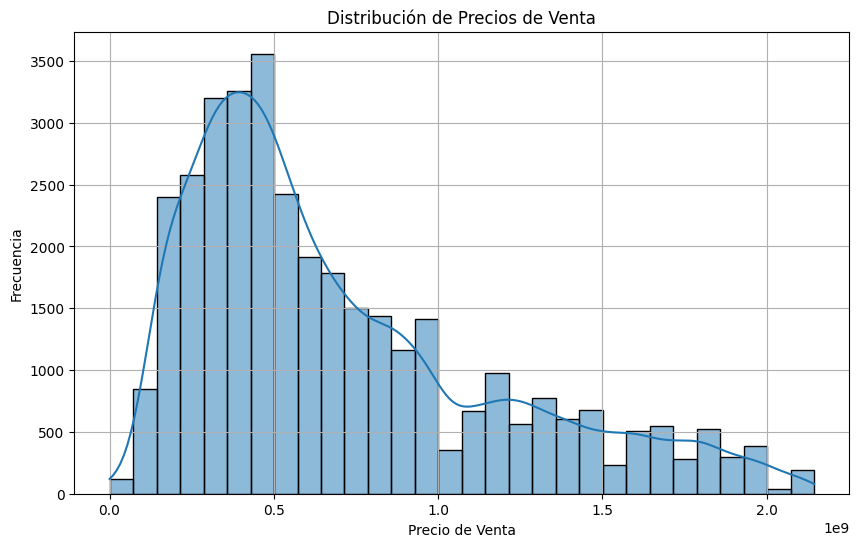

In [ ]:
# Gráfico de la distribución de precios de venta
plt.figure(figsize=(10, 6))
sns.histplot(train_data['precio_venta'], bins=30, kde=True)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

**¿Cual es la frecuenca de distacias de estaciones en bogota?**

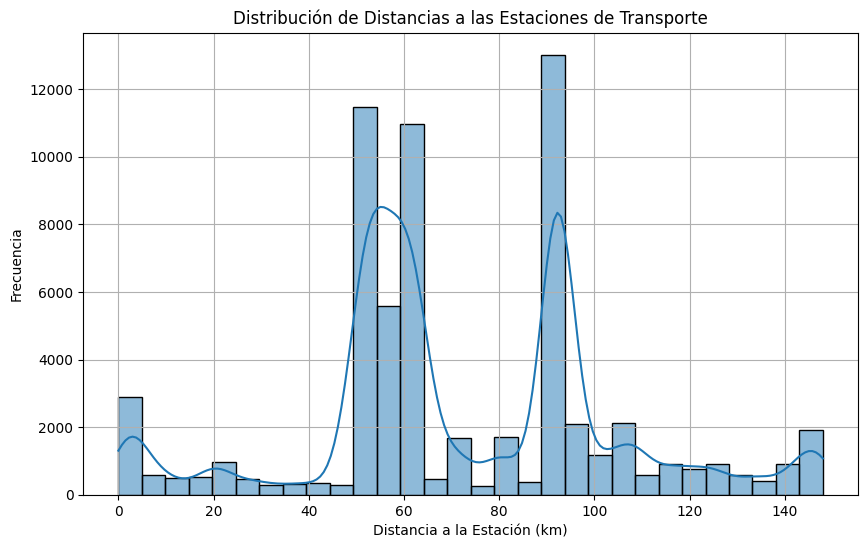

In [ ]:
# Visualizar la distribución de la distancia a la estación
plt.figure(figsize=(10, 6))
sns.histplot(train_data['troncal_mas_cercana'], bins=30, kde=True)
plt.title('Distribución de Distancias a las Estaciones de Transporte')
plt.xlabel('Distancia a la Estación (km)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

**¿Cómo varía el precio de venta según la distancia a la estación?**

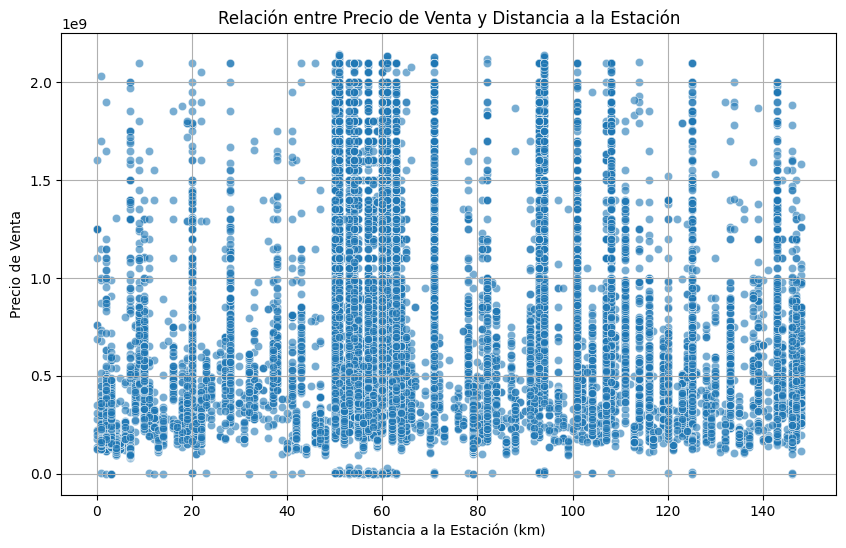

In [ ]:
# Gráfico de dispersión para visualizar la relación entre precios de venta y distancia a la estación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='troncal_mas_cercana', y='precio_venta', data=train_data, alpha=0.6)
plt.title('Relación entre Precio de Venta y Distancia a la Estación')
plt.xlabel('Distancia a la Estación (km)')
plt.ylabel('Precio de Venta')
plt.grid()
plt.show()

In [ ]:
train_data.shape

(66265, 23)

##Transformación de datos

In [ ]:
train_data

codigo tipo_propiedad tipo_operacion  precio_venta    area  \
71201  12500-M4529132    APARTAMENTO          VENTA  2.060000e+08   45.00   
56086   3147-M3711360    APARTAMENTO          VENTA  3.250000e+08   66.00   
59598    411-M4360992    APARTAMENTO          VENTA  6.800000e+08   94.56   
53007  12041-M4461498    APARTAMENTO          VENTA  2.050000e+09  257.00   
532     2328-M3330562    APARTAMENTO          VENTA  9.500000e+08  188.00   
...               ...            ...            ...           ...     ...   
6265    2996-M3158092    APARTAMENTO          VENTA  1.150000e+09  157.00   
54886  13036-M4461226    APARTAMENTO          VENTA  9.600000e+08  200.00   
76820       MC4548778    APARTAMENTO       ARRIENDO           NaN   65.00   
860      646-M3656432    APARTAMENTO          VENTA  6.950000e+08  185.00   
15795   5031-M4405405    APARTAMENTO       ARRIENDO           NaN   96.00   

       habitaciones  banos  administracion  parqueaderos         sector  ...  \
71201           2.0    1.0        201600.0           1.0      ORQUIDEAS  ...   
56086           3.0    2.0        190000.0           1.0        KENNEDY  ...   
59598           3.0    2.0        867700.0           2.0        COUNTRY  ...   
53007           3.0    4.0       1400000.0           4.0          CHICO  ...   
532             3.0    4.0        700000.0           2.0        COUNTRY  ...   
...             ...    ...             ...           ...            ...  ...   
6265            3.0    3.0        679000.0           2.0            NaN  ...   
54886           2.0    2.0             NaN           1.0          CHICO  ...   
76820           2.0    1.0             NaN           1.0  PUENTE ARANDA  ...   
860             3.0    2.0             NaN           0.0  NIZA ALHAMBRA  ...   
15795           2.0    3.0             NaN           2.0  SANTA BARBARA  ...   

       longitud   latitud                                  featured_interior  \
71201 -74.02800  4.743000  ['CALEFACCION', 'CITOFONOS', 'PARQUEADERO CUBI...   
56086 -74.12781  4.625737  ['CITOFONOS', 'ESTUDIO O BIBLIOTECA', 'PARQUEA...   
59598 -74.04923  4.706736  ['COCINA INTEGRAL', 'TIPO DE COMEDOR SALA COME...   
53007 -74.14500  4.648000  ['ALARMA', 'CHIMENEA', 'CUARTO DE SERVICIO', '...   
532   -74.03013  4.714134  ['APTO PARA NINOS', 'CITOFONOS', 'JACUZZI', 'S...   
...         ...       ...                                                ...   
6265        NaN       NaN  ['ESTUDIO O BIBLIOTECA', 'PARQUEADERO CUBIERTO...   
54886 -74.04724  4.657042  ['HALL DE ALCOBAS', 'JACUZZI', 'PISO 3', 'DEPO...   
76820 -74.10066  4.607013  ['CARACTERISTICAS DEL PARQUEADERO CUBIERTO', '...   
860   -74.06000  4.682000  ['CALEFACCION', 'CUARTO DE SERVICIO', 'HALL DE...   
15795 -74.04100  4.692000  ['INSTALACION DE GAS NATURAL', 'CALENTADOR GAS...   

                                       featured_exterior  \
71201  ['PARQUEADERO VISITANTES', 'CONJUNTO CERRADO',...   
56086     ['CONJUNTO CERRADO', 'NUMERO DE ASCENSORES 0']   
59598  ['NUMERO DE ASCENSORES 1', 'TERRAZA/BALCON BAL...   
53007  ['AREA TERRAZA/BALCON 1.0 M2', 'ASCENSOR', 'BA...   
532    ['ACCESO PARA DISCAPACITADOS', 'PISCINA', 'CON...   
...                                                  ...   
6265   ['AREA TERRAZA/BALCON 60 M2', 'VISTA PANORAMIC...   
54886                               ['VISTA PANORAMICA']   
76820  ['CERCA CENTROS COMERCIALES', 'CERCA COLEGIOS ...   
860                ['BANOS DE SERVICIO', 'VIGILANCIA 0']   
15795          ['TERRAZA/BALCON BALCON', 'VIGILANCIA 0']   

                                     featured_zona_comun  \
71201               ['SALON COMUNAL', 'ZONA PARA NINOS']   
56086                                  ['SALON COMUNAL']   
59598                                    ['ZONA DE BBQ']   
53007                      ['GIMNASIO', 'SALON COMUNAL']   
532    ['CANCHA(S) DE SQUASH', 'SALON COMUNAL', 'ZONA...   
...                                                  ...   
6265                       

In [ ]:
 train_data = train_data.drop(columns=['sector'])

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66265 entries, 71201 to 15795
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   codigo               66265 non-null  object             
 1   tipo_propiedad       66265 non-null  object             
 2   tipo_operacion       66265 non-null  object             
 3   precio_venta         35227 non-null  float64            
 4   area                 66262 non-null  float64            
 5   habitaciones         66258 non-null  float64            
 6   banos                66260 non-null  float64            
 7   administracion       44661 non-null  float64            
 8   parqueaderos         66258 non-null  float64            
 9   estrato              66248 non-null  float64            
 10  antiguedad           66243 non-null  object             
 11  estado               65256 non-null  object             
 12  longitud           

In [ ]:
# Filtrar las filas donde el valor de y ('precio_venta') no sea NaN
train_data = train_data[train_data['precio_venta'].notna()]

# Separar características y etiqueta objetivo
X = train_data.drop(columns=['precio_venta', 'codigo', 'descripcion', 'website'])
y = train_data['precio_venta']

In [ ]:
#----------- Eliminación de valores atípicos usando IQR -----------

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columnas numéricas y categóricas
numeric_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object']).columns
ordinal_cols = ['estrato', 'antiguedad']  # Ajusta según el contexto

# Remover outliers de columnas numéricas en X
X = remove_outliers_iqr(X, numeric_cols)

# Filtrar y para que tenga el mismo índice que X
y = y.loc[X.index]

In [ ]:
#----------- Definir el Pipeline de Preprocesamiento -----------

# Transformador para datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Filtrar columnas categóricas con alto cardinalidad para evitar demasiada expansión en OneHotEncoding
low_cardinality_cols = [col for col in categorical_cols if X[col].nunique() < 10]

# Transformador para datos categóricos de baja cardinalidad
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Transformador para datos ordinales
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

# Crear el preprocesador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, low_cardinality_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ]
)

##Generar el modelo

In [ ]:
#----------- Definir y Configurar Modelos -----------

# Modelos en pipelines
pipeline_models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', LinearRegression())]),

    'Polynomial Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                             ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Grado ajustado a 2
                                             ('scaler', StandardScaler()),  # Escalado después de términos polinómicos
                                             ('model', Ridge(alpha=1.0))]),  # Regularización con Ridge para evitar sobreajuste

    'KNN': Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', KNeighborsRegressor())]),

    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', RandomForestRegressor())])
}

In [ ]:
#----------- Dividir los Datos en Conjuntos de Entrenamiento y Prueba -----------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración de hiperparámetros ajustada
param_grid = {
    'KNN': {
        'model__n_neighbors': [3, 5, 7]  # Se añade un valor adicional para más opciones, pero se sigue acotado
    },
    'Random Forest': {
        'model__n_estimators': [50, 100],  # Se disminuye el rango para reducir tiempo
        'model__max_depth': [10, 15, None]
    }
}

# Uso de RandomizedSearchCV en lugar de GridSearchCV
best_models = {}
for name, pipeline in pipeline_models.items():
    if name in param_grid:
        search = RandomizedSearchCV(pipeline, param_grid[name], n_iter=3, cv=2, scoring='r2', verbose=1, n_jobs=-1)
        search.fit(X_train, y_train)
        best_models[name] = search.best_estimator_
    else:
        pipeline.fit(X_train, y_train)
        best_models[name] = pipeline

# Evaluación final de los modelos (nuevo código)
metrics_train = {'Model': [], 'R^2': [], 'MAE': [], 'MSE': [], 'RMSE': []}
metrics_test = {'Model': [], 'R^2': [], 'MAE': [], 'MSE': [], 'RMSE': []}

for name, model in best_models.items():
    # Predicciones en entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métricas de entrenamiento
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)

    metrics_train['Model'].append(name)
    metrics_train['R^2'].append(r2_train)
    metrics_train['MAE'].append(mae_train)
    metrics_train['MSE'].append(mse_train)
    metrics_train['RMSE'].append(rmse_train)

    # Métricas de prueba
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)

    metrics_test['Model'].append(name)
    metrics_test['R^2'].append(r2_test)
    metrics_test['MAE'].append(mae_test)
    metrics_test['MSE'].append(mse_test)
    metrics_test['RMSE'].append(rmse_test)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits


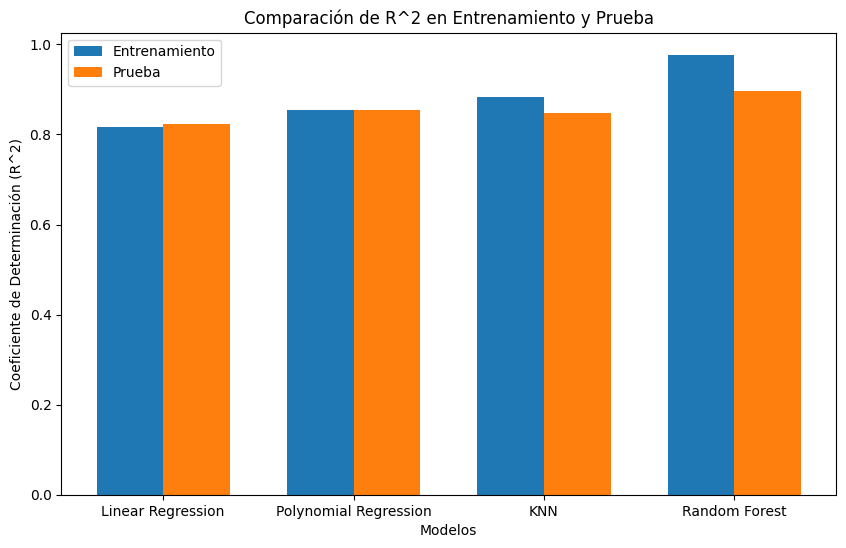

In [ ]:
# Gráfico de barras para comparar R^2 en entrenamiento y prueba
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(metrics_train['Model']))
bar_width = 0.35

bars1 = ax.bar(index, metrics_train['R^2'], bar_width, label='Entrenamiento')
bars2 = ax.bar(index + bar_width, metrics_test['R^2'], bar_width, label='Prueba')

ax.set_xlabel('Modelos')
ax.set_ylabel('Coeficiente de Determinación (R^2)')
ax.set_title('Comparación de R^2 en Entrenamiento y Prueba')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics_train['Model'])
ax.legend()

plt.show()

##Evaluación de desempeño

Resultados para Linear Regression:
 - R^2: 0.823
 - MSE: 27071493641645488.000
 - RMSE: 164534171.653
 - MAE: 114616045.418
------------------------------
Resultados para Polynomial Regression:
 - R^2: 0.855
 - MSE: 22180501307564968.000
 - RMSE: 148931196.556
 - MAE: 99030998.661
------------------------------
Resultados para KNN:
 - R^2: 0.849
 - MSE: 23096332253156292.000
 - RMSE: 151974775.055
 - MAE: 97116352.733
------------------------------
Resultados para Random Forest:
 - R^2: 0.896
 - MSE: 15847079156828594.000
 - RMSE: 125885182.436
 - MAE: 75430957.474
------------------------------


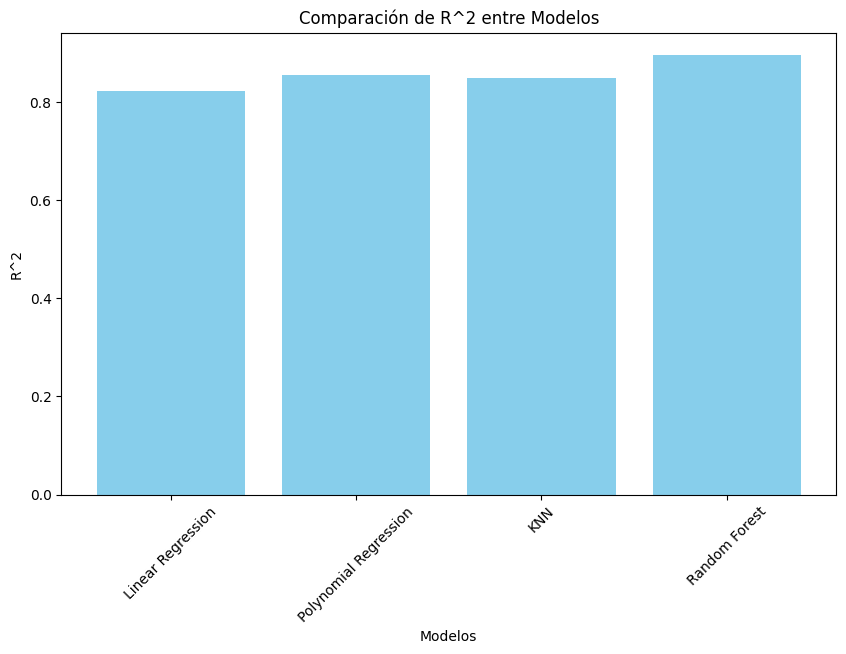

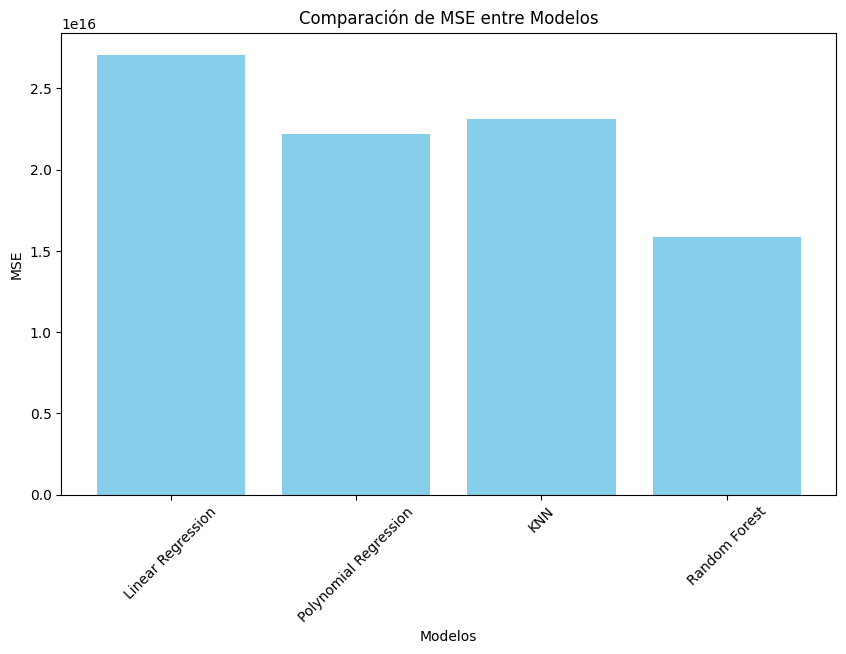

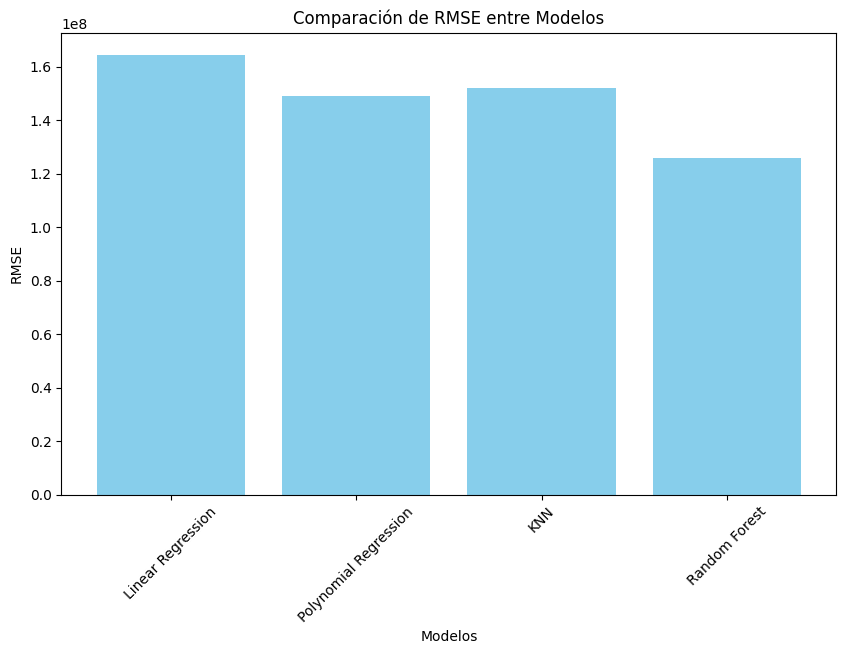

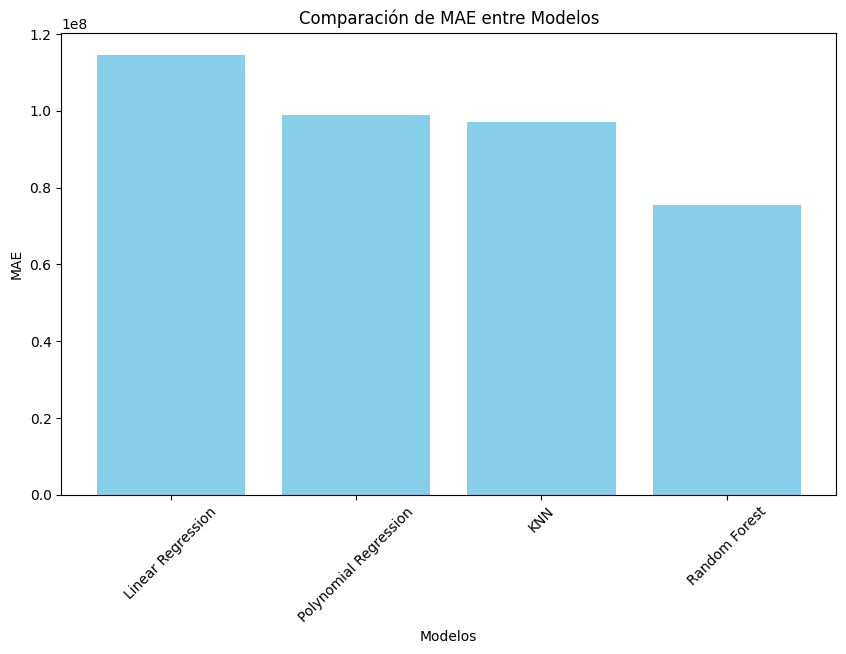

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Diccionarios para almacenar las métricas de cada modelo
r2_scores = {}
mse_scores = {}
rmse_scores = {}
mae_scores = {}

# Calcular y almacenar las métricas para cada modelo
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    r2_scores[name] = r2_score(y_test, y_pred)
    mse_scores[name] = mean_squared_error(y_test, y_pred)
    rmse_scores[name] = np.sqrt(mse_scores[name])  # Raíz cuadrada del MSE
    mae_scores[name] = mean_absolute_error(y_test, y_pred)

        # Imprimir resultados numéricos de cada métrica para el modelo actual
    print(f"Resultados para {name}:")
    print(f" - R^2: {r2_scores[name]:.3f}")
    print(f" - MSE: {mse_scores[name]:.3f}")
    print(f" - RMSE: {rmse_scores[name]:.3f}")
    print(f" - MAE: {mae_scores[name]:.3f}")
    print("-" * 30)

# Función para crear gráficos de barras
def plot_metric(metric_dict, metric_name):
    plt.figure(figsize=(10, 6))
    plt.bar(metric_dict.keys(), metric_dict.values(), color='skyblue')
    plt.xlabel('Modelos')
    plt.ylabel(metric_name)
    plt.title(f'Comparación de {metric_name} entre Modelos')
    plt.xticks(rotation=45)
    plt.show()

# Generar gráficos para cada métrica
plot_metric(r2_scores, 'R^2')
plot_metric(mse_scores, 'MSE')
plot_metric(rmse_scores, 'RMSE')
plot_metric(mae_scores, 'MAE')

**¿Cuál sería la más adecuada?**

En este contexto, RMSE suele ser la métrica preferida en problemas inmobiliarios por las siguientes razones:

Proporciona una medida del error en las unidades originales, lo cual es fácil de interpretar para las partes interesadas.
Penaliza errores grandes, lo cual es adecuado en predicción de precios de propiedades, ya que errores grandes pueden tener un impacto considerable en la toma de decisiones.
Sin embargo, también es útil revisar el MAE junto al RMSE, para obtener una visión más equilibrada de los errores promedio (MAE) y de la penalización de los valores atípicos (RMSE).

##Selección del modelo

**Seleccione el modelo**

Según los resultados, el modelo Random Forest sigue siendo el mejor para tu caso de entrenamiento. Presenta los valores más bajos en MAE (73,622,003.82), MSE (15,651,304,530,513,766.00) y RMSE (125,105,173.88), lo que indica que sus predicciones son, en promedio, más cercanas a los valores reales que las de los otros modelos. Además, su R² (0.897) es el más alto, lo que significa que aproximadamente el 89.7% de la variabilidad en los precios de venta se explica por el modelo, reflejando un buen ajuste y capacidad de predicción. Por último, el modelo Random Forest, al ser un modelo de ensamble, ofrece mayor robustez ante el sobreajuste, especialmente en datos con características no lineales y relaciones complejas, en comparación con modelos más simples como la regresión lineal y KNN.

**¿Considera que los datos proporcionados por la empresa son suficientes? ¿Son los adecuados?**

El conjunto de datos final cuenta con un total de 82,831 entradas, distribuidas en 66,265 para el entrenamiento y 16,567 para la prueba, lo que proporciona una base adecuada para entrenar modelos como KNN y Random Forest. Sin embargo, existen valores nulos en columnas clave, como precio_venta y administracion, lo que podría afectar la calidad del modelo. Aunque las características disponibles, como el tipo de propiedad, área y ubicación, son relevantes, el alto porcentaje de valores faltantes en algunas variables limita su capacidad predictiva. Además, sería beneficioso incluir información contextual sobre el mercado y variables macroeconómicas para mejorar la efectividad de las predicciones.

 **Recomendación para la empresa**

Para mejorar el modelo, se recomienda a la empresa aumentar el tamaño del conjunto de datos mediante la recopilación de más información sobre propiedades y estaciones de transporte. También es importante proporcionar características más completas, ya que algunas columnas presentan un alto porcentaje de datos faltantes. Implementar técnicas de feature engineering, como la creación de nuevas variables y la transformación de las existentes, enriquecería el análisis. Además, la validación cruzada podría ser útil para evaluar mejor la generalización del modelo. Por último, incorporar variables externas, como datos económicos y demográficos relevantes, ofrecería un contexto adicional que influiría de manera más efectiva en los precios.

###prediccion

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Definir la característica específica que se usará para la predicción
X_troncal = X[['troncal_mas_cercana']]

# Dividir los datos en entrenamiento y prueba
X_train_troncal, X_test_troncal, y_train, y_test = train_test_split(X_troncal, y, test_size=0.2, random_state=42)

# Configurar el pipeline con preprocesamiento y el modelo Random Forest
preprocessor_troncal = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['troncal_mas_cercana'])
    ]
)

pipeline_rf_troncal = Pipeline(steps=[
    ('preprocessor', preprocessor_troncal),
    ('model', RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42))
])

# Entrenar el modelo solo con 'troncal_mas_cercana'
pipeline_rf_troncal.fit(X_train_troncal, y_train)

# Crear un nuevo dato para la predicción (puedes cambiar la distancia según lo necesario)
nueva_distancia = 1.5  # Ejemplo de distancia a la troncal en kilómetros

# Crear un nuevo DataFrame con esta distancia
nuevo_dato = pd.DataFrame({'troncal_mas_cercana': [nueva_distancia]})

# Predecir el precio de venta usando el modelo
precio_predicho = pipeline_rf_troncal.predict(nuevo_dato)

print(f"Predicción del precio de venta para una distancia de {nueva_distancia} km a la troncal más cercana:")
print(f"Precio de venta predicho: {precio_predicho[0]:.2f}")

Predicción del precio de venta para una distancia de 1.5 km a la troncal más cercana:
Precio de venta predicho: 519913543.73
